In [170]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
import re
import json
import warnings 
warnings.filterwarnings("ignore")

In [171]:
df = pd.read_csv('population-in-uganda-by-census-year-1969-2014.csv')
df.tail()

,District,1969,1980,1991,2002,2014
131,Tororo,174102,206778,285299,379399,517080
132,Wakiso,293486,389433,563287,907988,1997418
133,Yumbe,56840,77980,99794,251784,484822
134,Zombo,78939,89510,131315,169048,240081
135,Uganda,9548847,12636179,16671705,24227297,34634650


In [172]:
#Rows and columns of dataset
df.shape

(136, 6)

In [173]:
#check for missing values
missing_values = df.isnull().sum()
print(missing_values)

District    0
1969        0
1980        0
1991        0
2002        0
2014        0
dtype: int64


In [174]:
bd=df.loc[df["District"]=='Tororo']
bd.drop(['District'],axis=1,inplace=True)
bd = bd.T
bd.head()

,131
1969,174102
1980,206778
1991,285299
2002,379399
2014,517080


In [175]:
bd.dropna(inplace=True)
bd=bd.reset_index().rename(columns={131:'population','index':'year'})
bd.head()

,year,population
0,1969,174102
1,1980,206778
2,1991,285299
3,2002,379399
4,2014,517080


In [176]:
df.isna().sum()

District    0
1969        0
1980        0
1991        0
2002        0
2014        0
dtype: int64

# Population growth in Uganda from 1969-2014

In [177]:
# Print the last row of the dataset
last_row = df.tail(1)
print(last_row)

    District     1969      1980      1991      2002      2014
135   Uganda  9548847  12636179  16671705  24227297  34634650


<Figure size 1000x600 with 0 Axes>

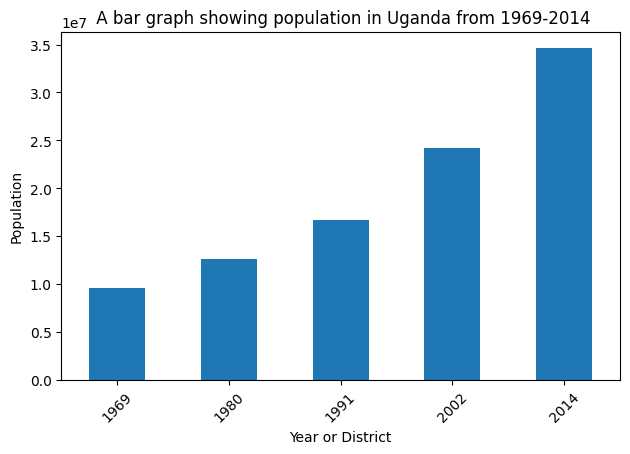

In [178]:
# Get the last row of the dataset
last_row = df.tail(1)

# Drop non-numeric columns (e.g., 'District')
last_row_numeric = last_row.drop(columns=['District'])

# Transpose the DataFrame to convert columns to rows
last_row_transposed = last_row_numeric.transpose()

# Plot the last row as a bar graph
plt.figure(figsize=(10, 6))
last_row_transposed.plot(kind='bar', legend=False)
plt.title(' A bar graph showing population in Uganda from 1969-2014')
plt.xlabel('Year or District')
plt.ylabel('Population')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Top 10 highly populated districts in Uganda

In [179]:
# Drop the last row (total population for all districts in Uganda)
df_without_total = df.iloc[:-1]

# Now you have a new DataFrame "df_without_total" without the last row
print(df_without_total.tail())  # Check the last few rows of the new DataFrame

       District    1969    1980    1991    2002     2014
130  Ssembabule   59363  102269  144039  180045   252597
131      Tororo  174102  206778  285299  379399   517080
132      Wakiso  293486  389433  563287  907988  1997418
133       Yumbe   56840   77980   99794  251784   484822
134       Zombo   78939   89510  131315  169048   240081


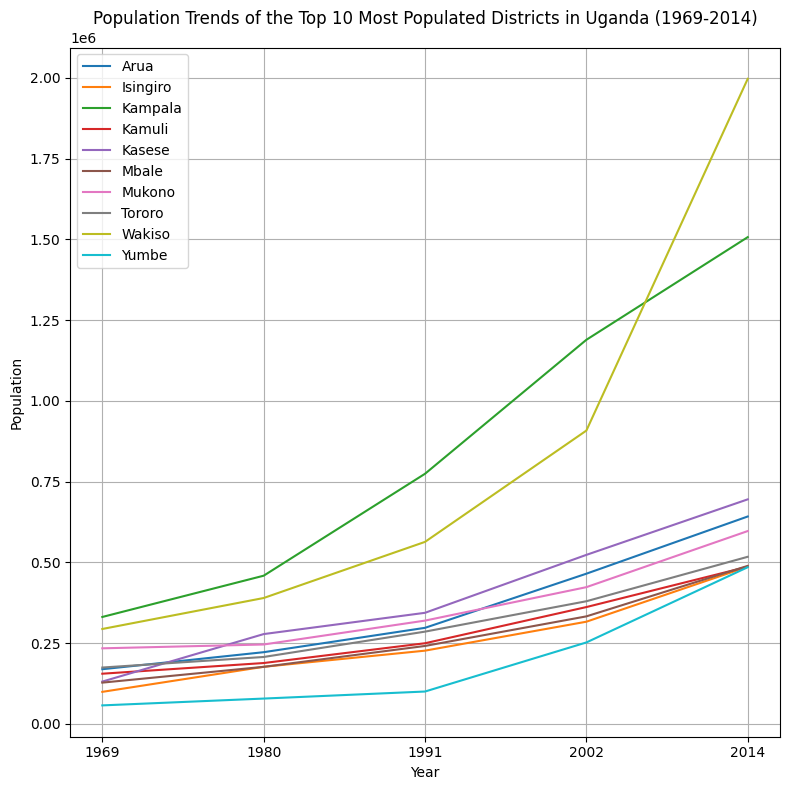

In [180]:
# Drop the last row (total population for all districts in Uganda)
df_without_total = df.iloc[:-1]

# Aggregate population by district
district_pop = df_without_total.groupby('District').sum()

# Select the top 10 most populated districts
top_10_districts = district_pop.nlargest(10, '2014')

# Filter the original dataframe to include only the top 10 districts
top_10_df = df_without_total[df_without_total['District'].isin(top_10_districts.index)]

# Transpose the DataFrame to convert columns to rows for plotting
top_10_df = top_10_df.set_index('District').T

# Plot the population trends of the top 10 most populated districts
plt.figure(figsize=(8, 8))
for district in top_10_df.columns:
    plt.plot(top_10_df.index, top_10_df[district], label=district)

plt.title('Population Trends of the Top 10 Most Populated Districts in Uganda (1969-2014)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Data Preparation

In [181]:
#extracting a district from the df
bd=df.loc[df["District"]=='Uganda']
# Drop the distict column from the new created dataFrame 
bd.drop(['District'],axis=1,inplace=True)
#Transposing a distric data
bd = bd.T
bd.dropna(inplace=True)
#column naming of the new District dataFrame
bd=bd.reset_index().rename(columns={135:'population','index':'year'})
bd.astype('int64')
bd.head()


,year,population
0,1969,9548847
1,1980,12636179
2,1991,16671705
3,2002,24227297
4,2014,34634650


In [182]:
#Split my data into labels[y(population)] and Features [x(year)]
x = bd[['year']].values 
y = bd['population'].values 
print("x=", x)
print("y=", y)

x= [['1969']
 ['1980']
 ['1991']
 ['2002']
 ['2014']]
y= [ 9548847 12636179 16671705 24227297 34634650]


## Model Evaluation Using LeaveOneOut CrossValidation (LOOCV)

In [183]:
# Initialize Leave-One-Out Cross-Validation
loocv = LeaveOneOut()
loocv.split(x)

<generator object BaseCrossValidator.split at 0x00000156733E86A0>

### Evaluating Simple LinearRegression

In [184]:
predicted_values =[]
Actual_values =[]
loo_rmse = []
for train_index, test_index in loocv.split(x):
    # print(train_index)
    # print(test_index)
                                   
    # Split data into training and testing sets
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # print(X_train)
    # print(y_train)
    
    # Initialize and train the model
    model = LinearRegression(fit_intercept=True, n_jobs=-1)
    model.fit(X_train, y_train) 

    # Make predictions
    y_pred = model.predict(X_test)
    predicted_values.append(y_pred)
    Actual_values.append(y_test)
    
    #calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    loo_rmse.append(rmse)

# Calculate average RMSE for LOOCV
avg_rmse = np.mean(loo_rmse)
print("Average RMSE for LOOCV:", avg_rmse)
print(np.array(predicted_values))
print(np.array(Actual_values))
  

Average RMSE for LOOCV: 3666220.3039887906
[[ 3920883.6238749 ]
 [13648720.19262314]
 [20123515.93962932]
 [26057166.9752028 ]
 [28225733.9636364 ]]
[[ 9548847]
 [12636179]
 [16671705]
 [24227297]
 [34634650]]


##### Simple LinearRegression Bias of (3,666,220.3039887906)

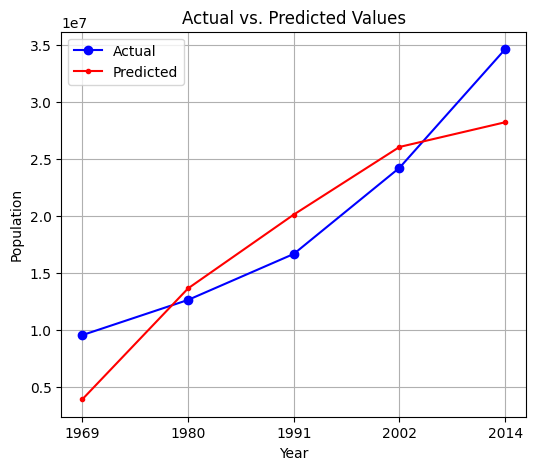

In [185]:
# Plot actual vs. predicted values
plt.figure(figsize=(6, 5))

# Scatter plot for actual values
plt.plot(x.flatten(), y, color='blue', label='Actual', marker='o')

# Scatter plot for predicted values
plt.plot(x.flatten(), predicted_values, color='red', label='Predicted', marker='.')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Actual vs. Predicted Values')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

### Evaluating Polynomial Regression

In [186]:
polypredicted_values =[]
polyActual_values =[]
ploo_rmse = []
# Polynomial degree
degree = 2  # Change this to the desired polynomial degree

# Iterate over each fold of LOOCV
for train_index, test_index in loocv.split(x):
    # Split data into training and testing sets
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Generate polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    # Initialize and train the model
    model = LinearRegression(fit_intercept=True, n_jobs=-1)
    model.fit(X_train_poly, y_train)

    
    # Make predictions
    y_pred = model.predict(X_test_poly)
    polypredicted_values.append(y_pred)
    polyActual_values.append(y_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    ploo_rmse.append(rmse)

# Calculate average RMSE for LOOCV
avg_rmse = np.mean(ploo_rmse)
print("Average RMSE for LOOCV with polynomial regression (degree={}):".format(degree), avg_rmse)
print(np.array(polypredicted_values))
print(np.array(polyActual_values))

Average RMSE for LOOCV with polynomial regression (degree=2): 607987.4192657471
[[10834353.00691986]
 [11965795.00221252]
 [17359395.70935822]
 [24137542.89205933]
 [34328047.72567749]]
[[ 9548847]
 [12636179]
 [16671705]
 [24227297]
 [34634650]]


#### Polynomial Regression Bias of (607987.4195373536)

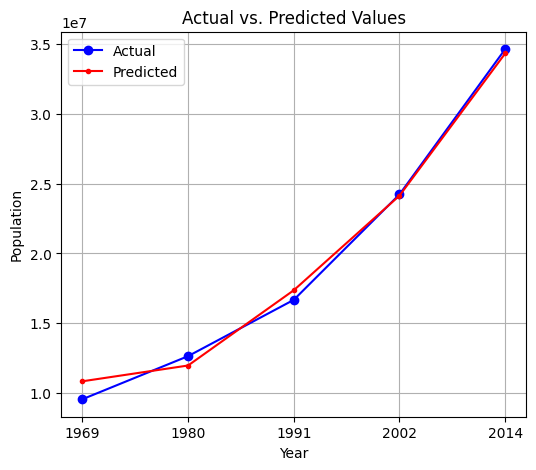

In [187]:
# Plot actual vs. predicted values
plt.figure(figsize=(6, 5))

# Scatter plot for actual values
plt.plot(x.flatten(), y, color='blue', label='Actual', marker='o')

# Scatter plot for predicted values
plt.plot(x.flatten(), polypredicted_values, color='red', label='Predicted', marker='.')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Actual vs. Predicted Values')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# MAKING FUTURE POPULATION PREDICTIONS WITH DIFFERENT REGRESSION MODELS

# Linear regression


In [188]:
#Get the array
x = bd.iloc[:, 0].values.reshape(-1, 1)
y = bd.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict([[2024]])
y_pred

#This function is creates a json file containing all the valid naming of the availabel district
def country_list_gen(df):
 # Get unique district names
    lists = df['District'].unique().tolist()
    
    # Write the list to JSON file, preserving original capitalization
    with open('District_list.json', 'w', encoding='utf-8') as f:
        json.dump(lists, f, ensure_ascii=False, indent=4)
    
    return lists, df

#Function enables country selection of the from the dataFrame 
def selecting_country(df,country):
    df = df.loc[df['District']== country]
    df.drop(['District'],axis=1,inplace=True)
    df = df.T
    df.dropna(inplace=True)
    df = df.reset_index()
    return df
    
#Function for training a model    
def prediction_model(df):
    x = df.iloc[:, 0].values.reshape(-1,1)
    y = df.iloc[:, 1].values.reshape(-1,1)
    model = LinearRegression().fit(x,y)
    return model
    
  #using the model function it returns the predictions  
def prediction(model, year):
    return int(model.coef_[0][0] * year + model.intercept_[0])

## main function for entry(Provides the input)
def main():
    district = input("Please input the district name: ")
    year = int(input("Please input the year to predict: "))
    df = pd.read_csv('population-in-uganda-by-census-year-1969-2014.csv')
    lists, df = country_list_gen(df)
    if district in lists:
        df = selecting_country(df, district)
        model = prediction_model(df)
        result = prediction(model,year)
        print(f"\n Result: {district.upper()} population in {year} will be {result:,d}")
    else:
        print('kindly check district name spelling from distict_list.json')
    
if __name__ == "__main__":
    main()
    45,404,631



 Result: UGANDA population in 2024 will be 37,697,204


# polynomial regression model

Predicted population for district Uganda in 2024: 46,079,522.40
Predicted population for district Uganda in 2024: 45,748,802.36
Predicted population for district Uganda in 2024: 45,406,167.55
Predicted population for district Uganda in 2024: 44,927,306.59
Predicted population for district Uganda in 2024: 44,883,528.60


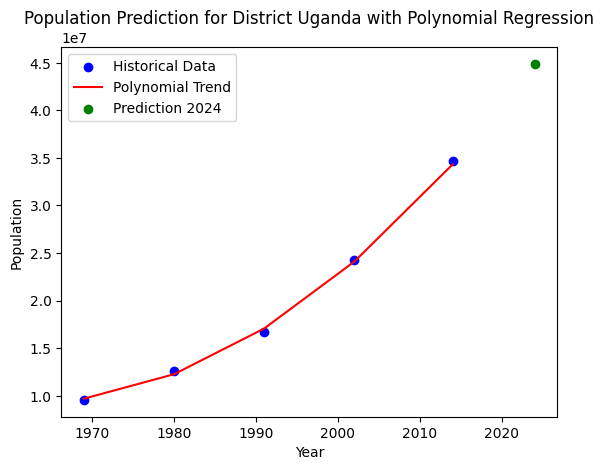

In [189]:

# Convert the dataset to a suitable format (melt)
df_melted = df.melt(id_vars='District', var_name='Year', value_name='Population')

# Convert 'Year' to an integer
df_melted['Year'] = df_melted['Year'].astype(int)

# Ask for district and future year input
district = input("Enter the district: ")
future_year = int(input("Enter the future year to predict: "))

# Polynomial degree for regression
poly_degree = 2

# Create Polynomial Features and Linear Regression model
poly_features = PolynomialFeatures(degree=poly_degree)
lin_reg = LinearRegression()

# Filter data for the specified district
df_district = df_melted[df_melted['District'] == district]
if df_district.empty:
    print(f"No data found for district {district}. Please check your input.")
else:
    # Create polynomial features from the years
    X = df_district[['Year']]
    y = df_district['Population']

    # Set the number of folds
    num_folds = 5

    # Create KFold object
    kf = KFold(n_splits=num_folds, shuffle=True)

    # Initialize lists to store MSE for each fold and test MSE
    fold_mse = []
    test_mse = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)

        # Train the polynomial regression model
        lin_reg.fit(X_train_poly, y_train)

        # Predict the population for the specified future year
        future_X = poly_features.transform([[future_year]])
        future_population = lin_reg.predict(future_X)[0]

        # Format the predicted population with commas for readability
        formatted_population = f"{future_population:,.2f}"

        # Display the formatted population
        print(f"Predicted population for district {district} in {future_year}: {formatted_population}")

    # Plot the data, polynomial trend, and prediction
    plt.scatter(X, y, color='blue', label='Historical Data')
    plt.plot(X, lin_reg.predict(poly_features.fit_transform(X)), color='red', label='Polynomial Trend')
    plt.scatter([future_year], [future_population], color='green', label=f'Prediction {future_year}')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title(f'Population Prediction for District {district} with Polynomial Regression')
    plt.legend()
    plt.show()